<a href="https://colab.research.google.com/github/mckay-moulton/BigQuery/blob/main/BigQuery_to_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **About:**
Use Python to perform basic cleaning and analysis of a query done in GCP's BigQuery, drawing from a public data set about vulnerabilities, found here: bigquery-public-data.deps_dev_v1.Advisories.

Origional Query: SELECT * FROM `bigquery-public-data.deps_dev_v1.Advisories`
WHERE `CVSS3Score` IS NOT NULL

In [59]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table
import pandas as pd

project = 'ml-ai-in-gcp' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job.

In [53]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_6acb5b1e_18df297f11e') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT * FROM `ml-ai-in-gcp.severity_global.severity_table` LIMIT 1000


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

In [54]:
# Read results from previous job
# Convert to df and take a peek
job = client.get_job('bquxjob_6acb5b1e_18df297f11e') # Job ID inserted based on the query results selected to explore
severity = job.to_dataframe()
severity.tail(4)

,SnapshotAt,Source,SourceID,SourceURL,Title,Description,ReferenceURLs,CVSS3Score,Severity,GitHubSeverity,Disclosed,Packages,Aliases
996,2023-10-23 21:01:31.784324+00:00,OSV,GHSA-8c93-4hch-xgxp,https://osv.dev/vulnerability/GHSA-8c93-4hch-xgxp,Cloudflare Wrangler directory traversal vulner...,### Impact \nThe Wrangler command line tool (<...,[https://developers.cloudflare.com/workers/wra...,5.700000000,UNKNOWN,MODERATE,2023-08-03 16:34:31+00:00,"[{'System': 'NPM', 'Name': 'wrangler', 'Affect...",[]
997,2023-10-23 21:01:31.784324+00:00,OSV,GHSA-w8hg-mxvh-9h57,https://osv.dev/vulnerability/GHSA-w8hg-mxvh-9h57,Malicious Package in angular-bmap,Version 0.0.9 of `angular-bmap` contained mali...,[https://github.com/github/advisory-database/b...,9.800000000,UNKNOWN,CRITICAL,2020-09-01 19:42:49+00:00,"[{'System': 'NPM', 'Name': 'angular-bmap', 'Af...",[]
998,2023-10-23 21:01:31.784324+00:00,OSV,GHSA-3h9m-9g3g-5wqx,https://osv.dev/vulnerability/GHSA-3h9m-9g3g-5wqx,Malicious Package in buffer-xov,Version 2.0.2 contained malicious code. The pa...,[https://github.com/github/advisory-database/b...,9.800000000,UNKNOWN,CRITICAL,2020-09-03 22:13:14+00:00,"[{'System': 'NPM', 'Name': 'buffer-xov', 'Affe...",[]
999,2023-10-23 21:01:31.784324+00:00,OSV,GHSA-5379-r78w-42h2,https://osv.dev/vulnerability/GHSA-5379-r78w-42h2,Unlimited transforms allowed for signed nodes,### Impact\nA malicious SAML payload can requi...,[https://github.com/github/advisory-database/b...,5.300000000,UNKNOWN,MODERATE,2021-08-30 16:11:57+00:00,"[{'System': 'NPM', 'Name': 'passport-saml', 'A...",[]


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)



In [55]:
severity.describe()

<ipython-input-55-83a90428c0f2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  severity.describe()
<ipython-input-55-83a90428c0f2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  severity.describe()


,SnapshotAt,Source,SourceID,SourceURL,Title,Description,ReferenceURLs,CVSS3Score,Severity,GitHubSeverity,Disclosed,Packages,Aliases
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,39,3,937,953,877,921,997,64,5,5,878,946,1000
top,2024-01-08 21:01:26.160683+00:00,GHSA,GHSA-3pph-2595-cgfh,https://github.com/advisories/GHSA-3pph-2595-cgfh,Downloads Resources over HTTP,All versions of this package contained malware...,[https://www.owasp.org/index.php/Regular_expre...,7.500000000,UNKNOWN,MODERATE,2016-12-01 00:00:00+00:00,"[{'System': 'MAVEN', 'Name': 'org.apache.solr:...",[]
freq,50,613,3,3,17,11,2,170,324,380,8,3,1
first,2022-05-08 02:05:29.029028+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-10-17 00:00:00+00:00,NaN,NaN
last,2024-02-19 21:01:24.170247+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-03 21:24:56+00:00,NaN,NaN


In [56]:
# Some cleaning____________________________________________________________________

# Won't need these
cleaning_severity = severity.drop(['ReferenceURLs', 'Aliases'], axis=1)


# Clean up date
import pandas as pd
# Convert the "date" and "Disclosed" column to datetime format
cleaning_severity['SnapshotAt'] = pd.to_datetime(cleaning_severity['SnapshotAt'])
cleaning_severity['Disclosed'] = pd.to_datetime(cleaning_severity['Disclosed'])

# Format the "date" column to only display day, month, and year
cleaning_severity['SnapshotAt'] = cleaning_severity['SnapshotAt'].dt.strftime('%Y-%m-%d')
cleaning_severity['Disclosed'] = cleaning_severity['Disclosed'].dt.strftime('%Y-%m-%d')

#check work
from IPython.display import display
display(cleaning_severity.head())


,SnapshotAt,Source,SourceID,SourceURL,Title,Description,CVSS3Score,Severity,GitHubSeverity,Disclosed,Packages
0,2023-03-13,OSV,GHSA-fqr5-qphf-vfr8,https://osv.dev/vulnerability/GHSA-fqr5-qphf-vfr8,Cross Site Scripting (XSS) in Simiki,Cross Site Scripting (XSS) in Simiki v1.6.2.1 ...,6.100000000,UNKNOWN,MODERATE,2021-09-01,"[{'System': 'PYPI', 'Name': 'simiki', 'Affecte..."
1,2023-03-13,OSV,GHSA-465f-mxxh-grc4,https://osv.dev/vulnerability/GHSA-465f-mxxh-grc4,Baremetrics date range picker vulnerable to Cr...,The Baremetrics date range picker is a solutio...,6.100000000,UNKNOWN,MODERATE,2023-02-21,"[{'System': 'NPM', 'Name': 'baremetrics-calend..."
2,2023-03-13,OSV,GHSA-4mmh-5vw7-rgvj,https://osv.dev/vulnerability/GHSA-4mmh-5vw7-rgvj,Venice vulnerable to Partial Path Traversal is...,### Impact\nA partial path traversal issue exi...,6.100000000,UNKNOWN,MODERATE,2022-08-18,"[{'System': 'MAVEN', 'Name': 'com.github.jlang..."
3,2023-03-13,OSV,GHSA-h7g4-65mf-6mxh,https://osv.dev/vulnerability/GHSA-h7g4-65mf-6mxh,Cross-site Scripting in Graylog Server,Graylog before v2.4.4 has an XSS security issu...,6.100000000,UNKNOWN,MODERATE,2022-05-14,"[{'System': 'MAVEN', 'Name': 'org.graylog2:gra..."
4,2023-03-13,OSV,GHSA-2pp9-r4rv-6p6j,https://osv.dev/vulnerability/GHSA-2pp9-r4rv-6p6j,Exposure of Sensitive Information to an Unauth...,A exposure of sensitive information vulnerabil...,4.300000000,UNKNOWN,MODERATE,2022-05-14,"[{'System': 'MAVEN', 'Name': 'org.jenkins-ci.m..."


In [57]:
pip install pandas matplotlib


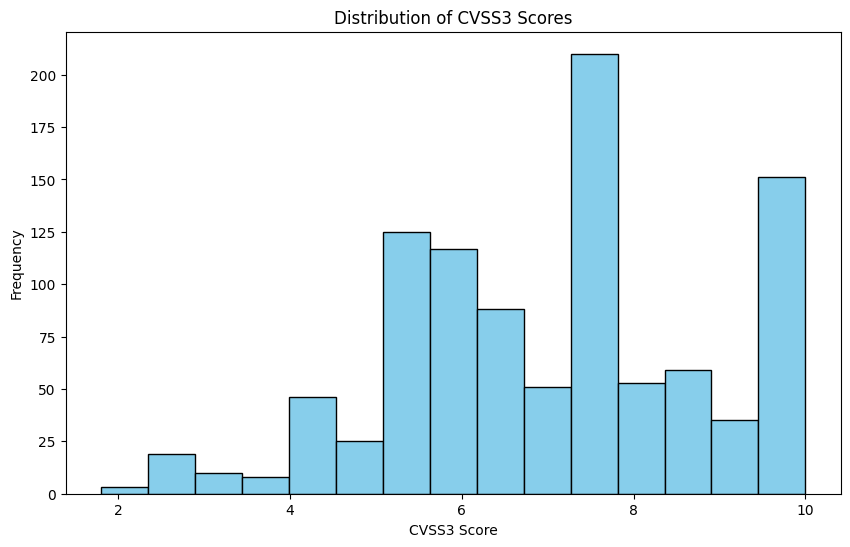

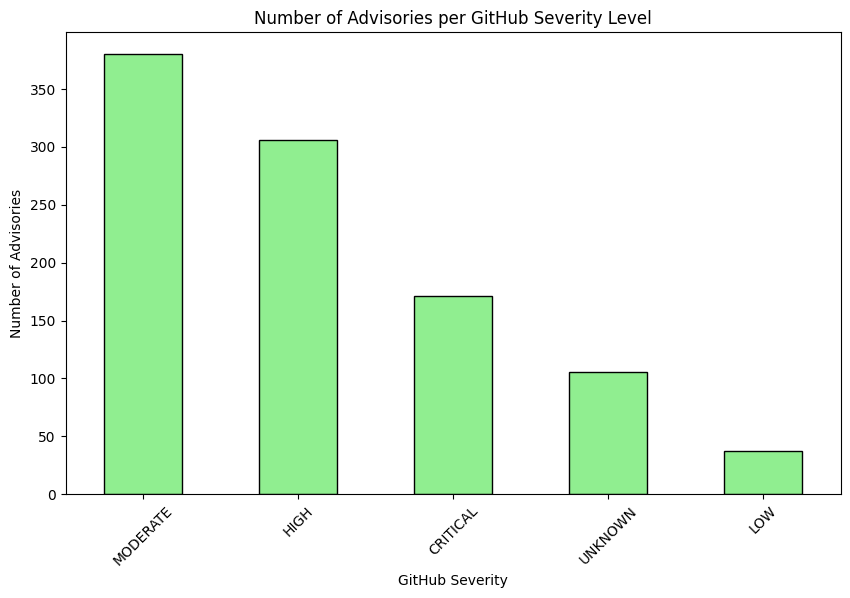

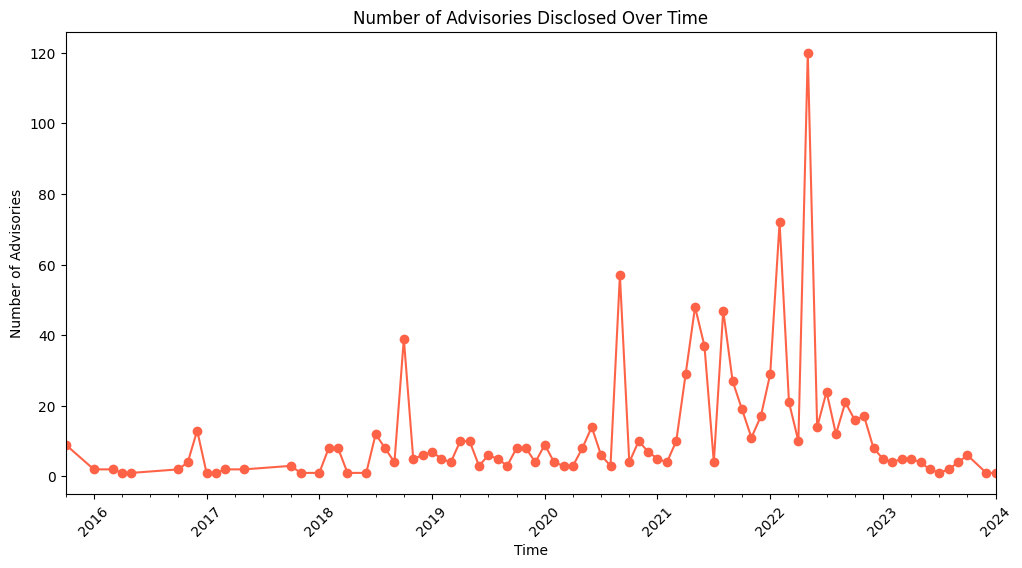

In [58]:
import matplotlib.pyplot as plt

def analyze_vulnerability_data(df):
    # Convert 'Disclosed' to datetime and 'CVSS3Score' to numeric
    cleaning_severity['Disclosed'] = pd.to_datetime(cleaning_severity['Disclosed'])
    cleaning_severity['CVSS3Score'] = pd.to_numeric(cleaning_severity['CVSS3Score'], errors='coerce')

    # 1. CVSS3Score Analysis: Histogram of CVSS3 Scores
    plt.figure(figsize=(10, 6))
    cleaning_severity['CVSS3Score'].hist(bins=15, color='skyblue', edgecolor='black')
    plt.title('Distribution of CVSS3 Scores')
    plt.xlabel('CVSS3 Score')
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

    # 2. Severity Analysis: Count of advisories per severity level
    plt.figure(figsize=(10, 6))
    cleaning_severity['GitHubSeverity'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
    plt.title('Number of Advisories per GitHub Severity Level')
    plt.xlabel('GitHub Severity')
    plt.ylabel('Number of Advisories')
    plt.xticks(rotation=45)
    plt.show()

    # 3. Disclosure Date Analysis: Advisories disclosed over time
    df['YearMonth'] = cleaning_severity['Disclosed'].dt.to_period('M')
    advisories_per_month = cleaning_severity.groupby('YearMonth').size()

    plt.figure(figsize=(12, 6))
    advisories_per_month.plot(kind='line', marker='o', color='tomato')
    plt.title('Number of Advisories Disclosed Over Time')
    plt.xlabel('Time')
    plt.ylabel('Number of Advisories')
    plt.xticks(rotation=45)
    plt.show()

# Run function and output graphs
analyze_vulnerability_data(cleaning_severity)
